In [5]:
import pandas as pd
df_merged = pd.read_csv("merged_channel_video.csv")


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()


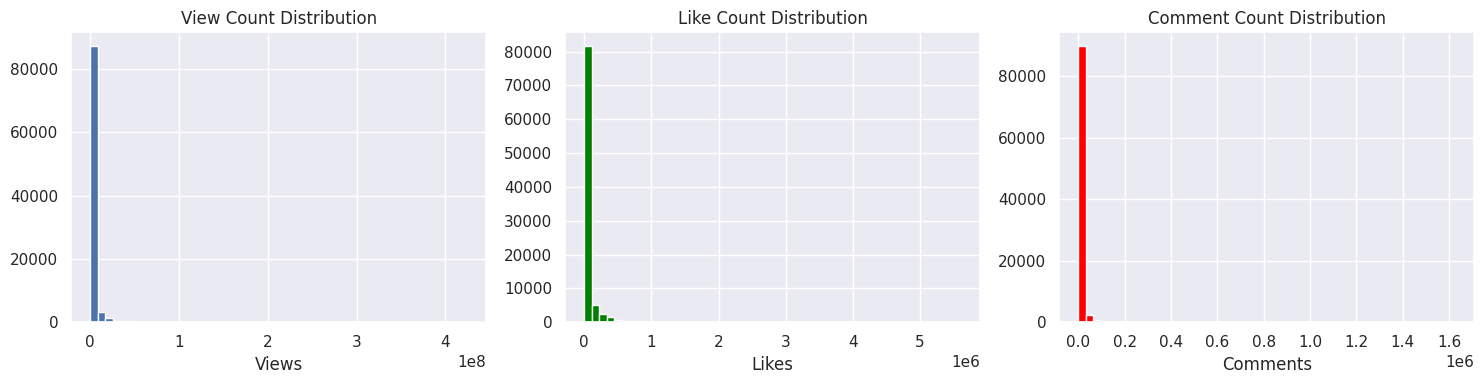

In [7]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.hist(df_merged["views"], bins=50)
plt.title("View Count Distribution")
plt.xlabel("Views")

plt.subplot(1,3,2)
plt.hist(df_merged["likes"], bins=50, color="green")
plt.title("Like Count Distribution")
plt.xlabel("Likes")

plt.subplot(1,3,3)
plt.hist(df_merged["comment_count"], bins=50, color="red")
plt.title("Comment Count Distribution")
plt.xlabel("Comments")

plt.tight_layout()
plt.show()


In [10]:
import numpy as np


In [11]:
import numpy as np   # ← 꼭 필요함!

# 채널별 트렌딩 영상 수 계산
channel_trend_count = (
    df_merged.groupby("channel_id")["video_id"]
    .nunique()
    .reset_index()
    .rename(columns={"video_id": "trending_video_count"})
)

# 채널별 전체 업로드 수
df_channel = df_merged[[
    "channel_id", "subscriber_count", "video_count"
]].drop_duplicates()

# 결합
df_ratio = channel_trend_count.merge(df_channel, on="channel_id", how="left")

# 트렌딩 비율 계산
df_ratio["trending_ratio"] = (
    df_ratio["trending_video_count"] /
    df_ratio["video_count"].replace(0, np.nan)
).fillna(0)


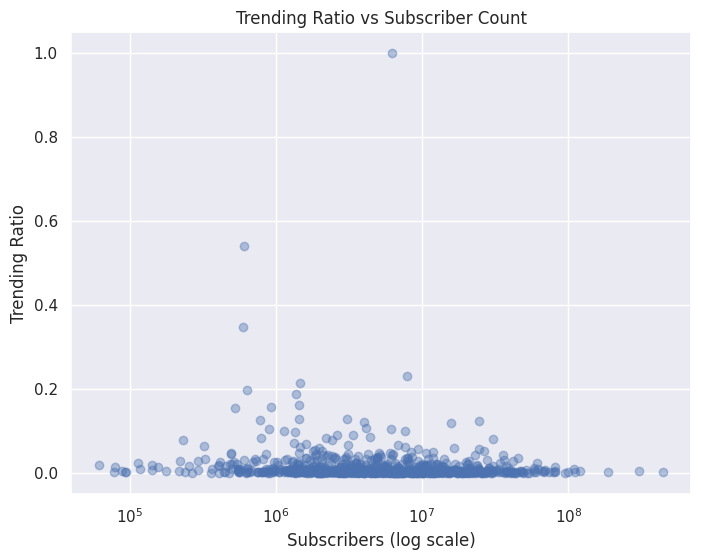

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(df_ratio["subscriber_count"], df_ratio["trending_ratio"], alpha=0.4)
plt.xscale("log")
plt.xlabel("Subscribers (log scale)")
plt.ylabel("Trending Ratio")
plt.title("Trending Ratio vs Subscriber Count")
plt.show()


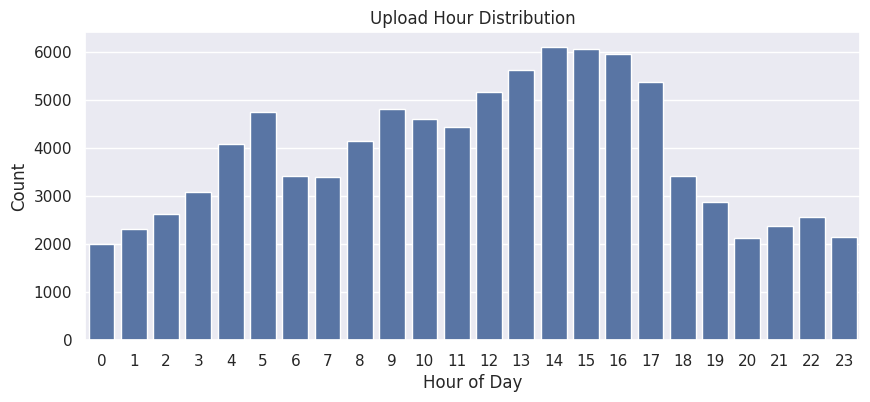

In [13]:
plt.figure(figsize=(10,4))
sns.countplot(x=df_merged["upload_hour"])
plt.title("Upload Hour Distribution")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()


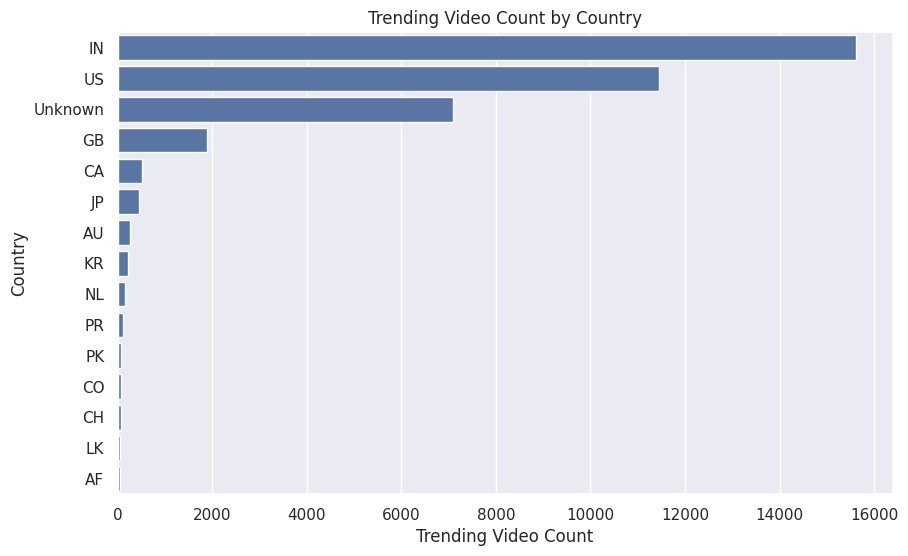

In [14]:
plt.figure(figsize=(10,6))
country_counts = df_merged["country_y"].value_counts().head(15)
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title("Trending Video Count by Country")
plt.xlabel("Trending Video Count")
plt.ylabel("Country")
plt.show()


In [16]:
df_merged["trending_days"].describe()


,trending_days
count,93615.000000
mean,9.027934
std,10.151194
min,1.000000
25%,2.000000
50%,4.000000
75%,13.000000
max,38.000000
